Se realiza un análisis más profundo de las series temporales con el objetivo de capturar la estacionalidad en el dataset de demanda de efectivo en cajeros automáticos (ATMs). Este análisis ayudará a identificar patrones recurrentes en diferentes períodos de tiempo que pueden influir en la demanda.

 El dataset creado con datos sinteticos atm_historical_data_with_features.csv contiene un total de 3,580 observaciones o registros. Esto corresponde a los datos generados para 10 cajeros automáticos (ATMs) durante un año completo (365 días).

### **1. Importar Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


### **2. Cargar y Preprocesar el Dataset**

In [2]:
# Cargar el dataset
df = pd.read_csv('atm_historical_data_with_features.csv')

# Convertir la columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordenar el dataset por fecha
df = df.sort_values('Date')

# Establecer la columna de fecha como índice
df.set_index('Date', inplace=True)

# Visualizar las primeras filas para confirmar los cambios
print(df.head())


            ATM_ID    Agency Day_of_Week  Soles_Withdrawn  Dollars_Withdrawn  \
Date                                                                           
2023-01-08       1  Agency_1      Sunday            20475               8563   
2023-01-08       7  Agency_7      Sunday            43556               5047   
2023-01-08       6  Agency_6      Sunday            46733               5489   
2023-01-08       9  Agency_9      Sunday            23565               3100   
2023-01-08       5  Agency_5      Sunday            43884              17558   

                   Event  Holiday  Supply_Cost_Fixed  Supply_Cost_Variable  \
Date                                                                         
2023-01-08  Sports Event        0                 56                 29.04   
2023-01-08      Festival        0                 60                 48.60   
2023-01-08       Concert        0                153                 52.22   
2023-01-08      Festival        0                

### **3. Descomposición de Series Temporales**

La descomposición de una serie temporal divide los datos en tres componentes clave:

-**Tendencia (Trend)**: Muestra la dirección general en la que se mueve la serie temporal.

-**Estacionalidad (Seasonal):** Muestra los patrones recurrentes que se repiten en intervalos regulares.

-**Ruido (Residual):** Representa la variabilidad que no puede ser explicada por la tendencia o la estacionalidad.

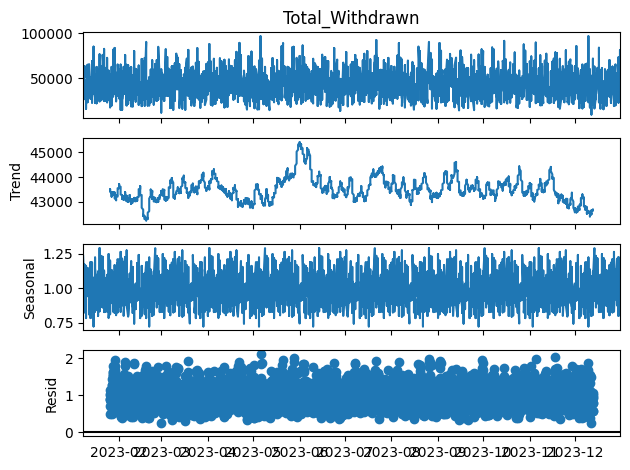

In [3]:
# Descomponer la serie temporal para la demanda total de efectivo
result = seasonal_decompose(df['Total_Withdrawn'], model='multiplicative', period=365)

# Visualizar la descomposición
result.plot()
plt.show()


### **4. Análisis de la Tendencia**

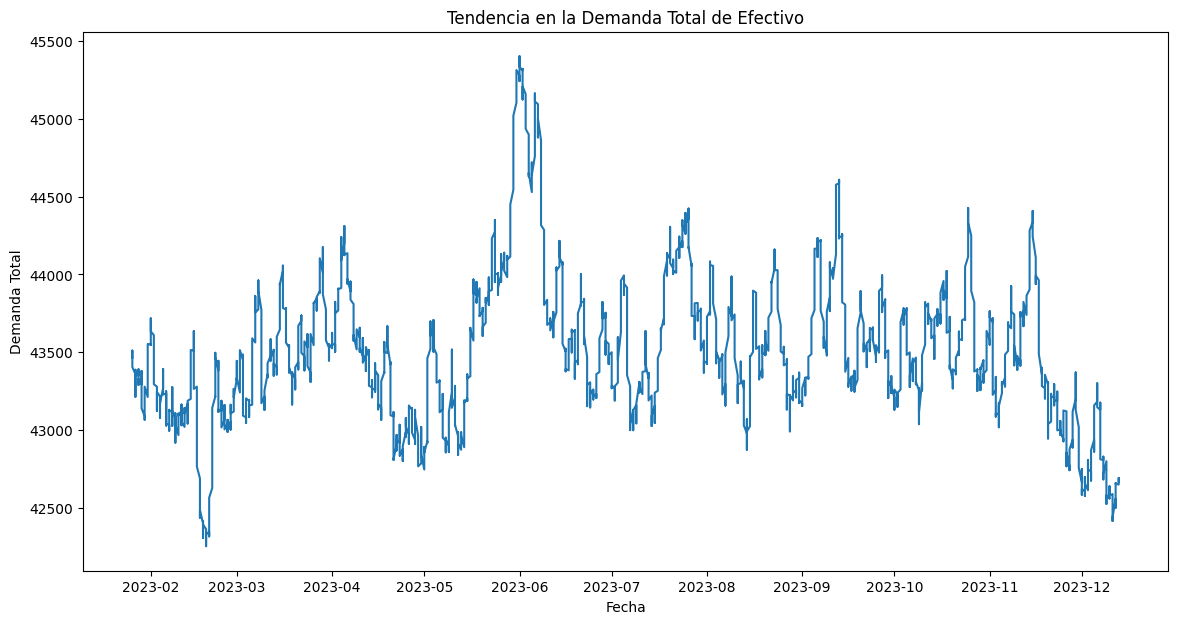

In [4]:
# Visualizar la tendencia
plt.figure(figsize=(14, 7))
plt.plot(result.trend)
plt.title('Tendencia en la Demanda Total de Efectivo')
plt.xlabel('Fecha')
plt.ylabel('Demanda Total')
plt.show()

### **5. Análisis de la Estacionalidad**

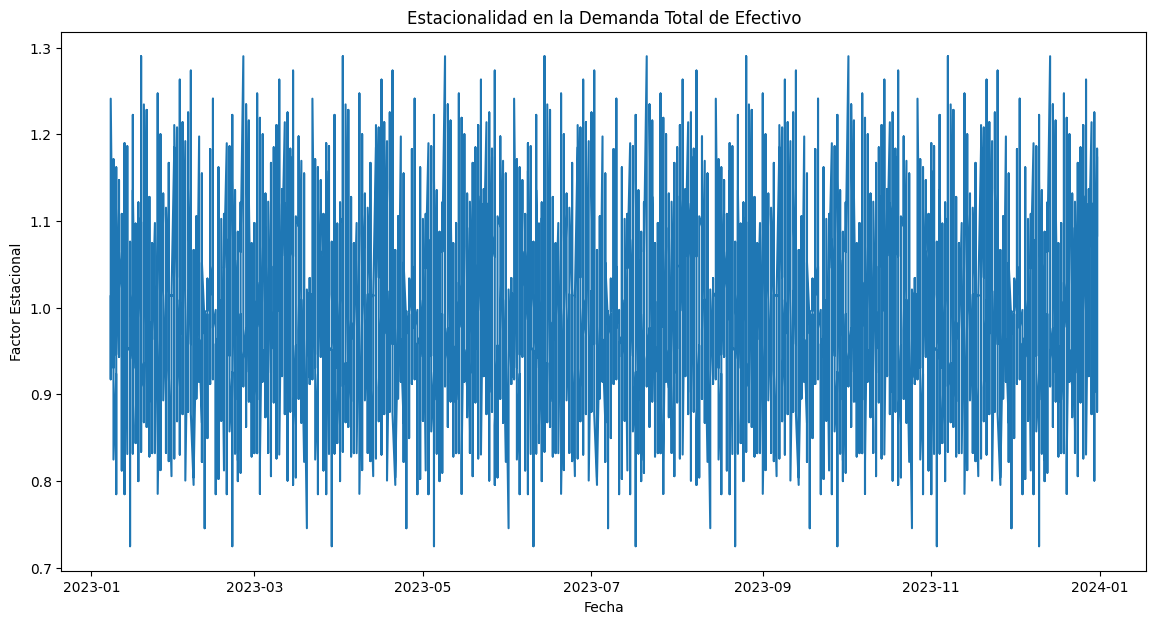

In [5]:
# Visualizar la estacionalidad
plt.figure(figsize=(14, 7))
plt.plot(result.seasonal)
plt.title('Estacionalidad en la Demanda Total de Efectivo')
plt.xlabel('Fecha')
plt.ylabel('Factor Estacional')
plt.show()


### **6. Análisis del Componente Residual**

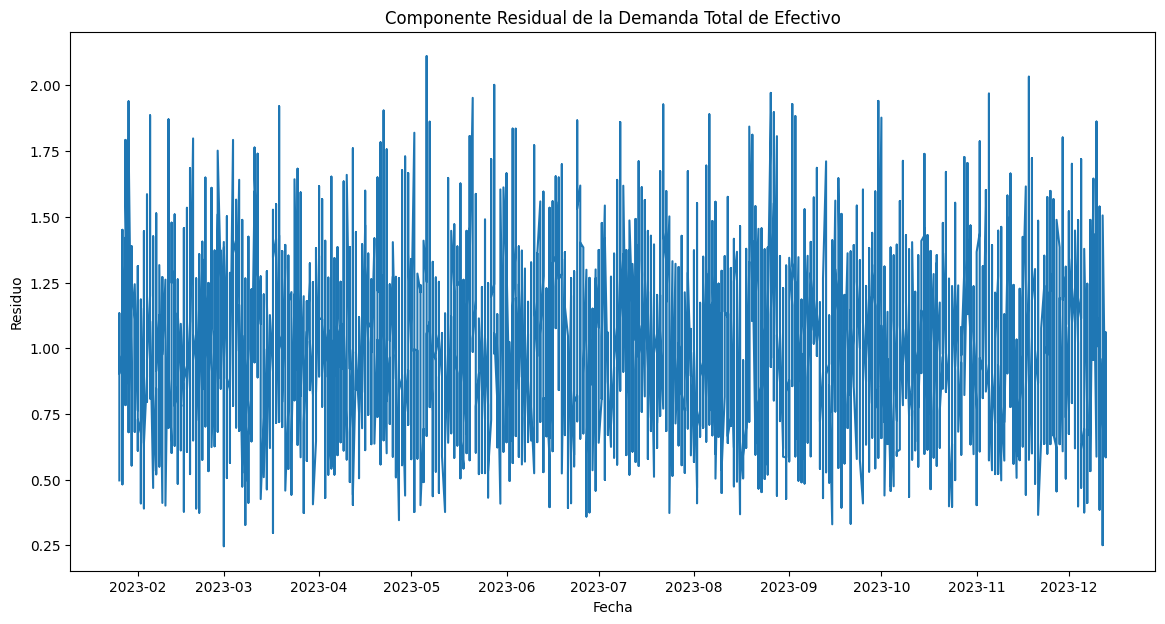

In [6]:
# Visualizar el ruido
plt.figure(figsize=(14, 7))
plt.plot(result.resid)
plt.title('Componente Residual de la Demanda Total de Efectivo')
plt.xlabel('Fecha')
plt.ylabel('Residuo')
plt.show()


### **7. Modelado de Estacionalidad con Holt-Winters**

El método Holt-Winters (o triple suavizado exponencial) es una técnica que extiende el suavizado exponencial para manejar tanto la tendencia como la estacionalidad. Este modelo es útil para predecir valores futuros en series temporales con componentes estacionales y de tendencia.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


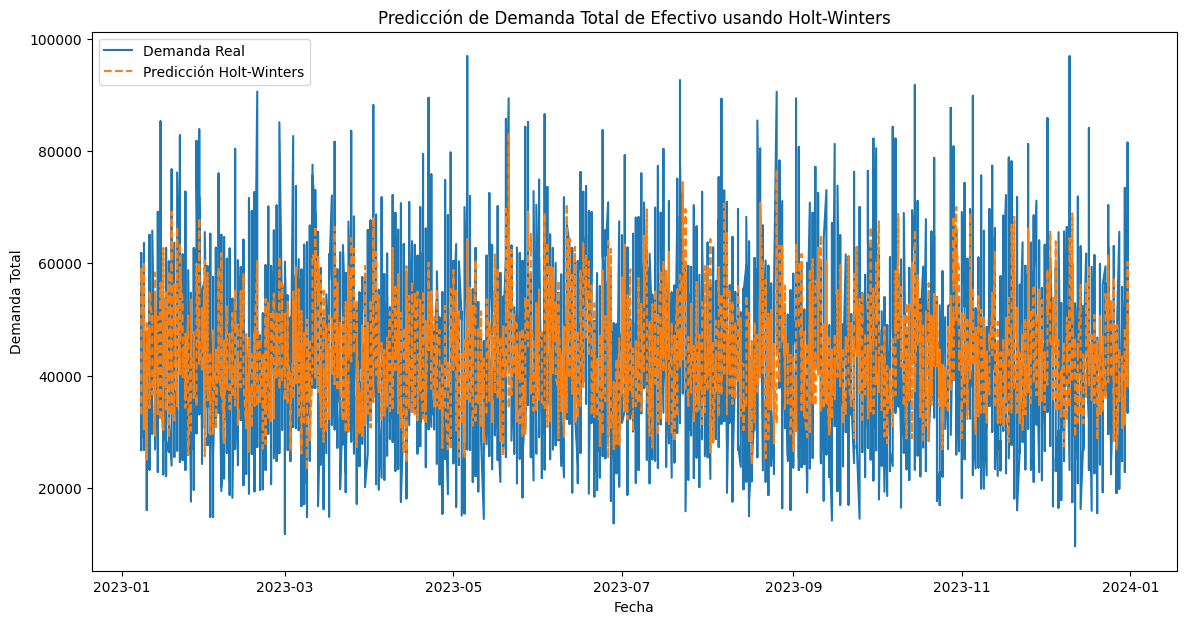

In [7]:
# Modelado usando Holt-Winters para capturar la estacionalidad y tendencia
model = ExponentialSmoothing(
    df['Total_Withdrawn'],
    seasonal='multiplicative',
    trend='additive',
    seasonal_periods=365
)
fitted_model = model.fit()

# Predecir la demanda futura
df['Holt_Winters_Prediction'] = fitted_model.fittedvalues

# Visualizar las predicciones junto con la demanda real
plt.figure(figsize=(14, 7))
plt.plot(df['Total_Withdrawn'], label='Demanda Real')
plt.plot(df['Holt_Winters_Prediction'], label='Predicción Holt-Winters', linestyle='--')
plt.title('Predicción de Demanda Total de Efectivo usando Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Demanda Total')
plt.legend()
plt.show()


### **8. Evaluación del Modelo**

In [9]:
# Calcular el error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['Total_Withdrawn'], df['Holt_Winters_Prediction'])
print(f'Error Cuadrático Medio (MSE): {mse}')


Error Cuadrático Medio (MSE): 207328910.01544386


**Conclusiones**

- La descomposición de series temporales ha permitido identificar claramente la tendencia, estacionalidad y componente residual en la demanda de efectivo.
- El modelo Holt-Winters es eficaz para capturar la estacionalidad y la tendencia en los datos, proporcionando predicciones razonablemente precisas.
- Los próximos pasos pueden incluir la comparación de este modelo con otros enfoques (como ARIMA o Prophet) y la integración de estos insights en un modelo predictivo más robusto.

Este notebook proporciona un análisis detallado de las series temporales y permite capturar la estacionalidad en la demanda de efectivo en cajeros automáticos.